In [78]:
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tqdm import tqdm

In [79]:
alpha = 0.4

def P_0(eta):
    return np.max([eta, 1-eta])


def Prob(n,alpha,beta):
    p0 = np.exp(-(alpha+beta)**2)
    if n==0:
        return p0
    else:
        return 1-p0
    
def Prob_Outcome(n, alpha, beta, eta):
    q=0
    for a,et in zip([alpha, -alpha], [eta, 1-eta]):
       q+= et*Prob(n,a,beta)
    return q

def Postirior(n, alpha, beta, eta):
    po = Prob(n, alpha, beta)*eta
    po /= Prob_Outcome(n, alpha, beta, eta)
    return po

def P_1(beta, eta):
    p=0
    for n in [0,1]:
        p+= Prob_Outcome(n, alpha, beta,eta)*P_0(Postirior(n, alpha, beta,eta))
    return 1-p

In [80]:
give_lim= lambda eta,a : ((-2,2)) if eta>0.01 else ((a-1e-5, a+1e-5))

etas_min = np.linspace(1e-10,.5,100)
PS = np.zeros((1,2*len(etas_min)))
BOPT = np.zeros((1,2*len(etas_min)))
for ind_eta, eta in enumerate(tqdm(etas_min)):
    optimization = optimize.minimize_scalar(P_1, args=(eta), method="bounded", bounds = give_lim(eta,alpha))#, bonuds= bounds=((-2,2)))#, options={"maxiter":10**9, "xatol":1e-35})
    PS[0,ind_eta]=optimization.fun
    BOPT[0,ind_eta]=optimization.x

PS[0,len(etas_min):] = PS[0,:len(etas_min)][::-1]
BOPT[0,len(etas_min):] = -BOPT[0,:len(etas_min)][::-1]


100%|██████████| 100/100 [00:00<00:00, 672.63it/s]


In [81]:
from scipy import interpolate

array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05,
       1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

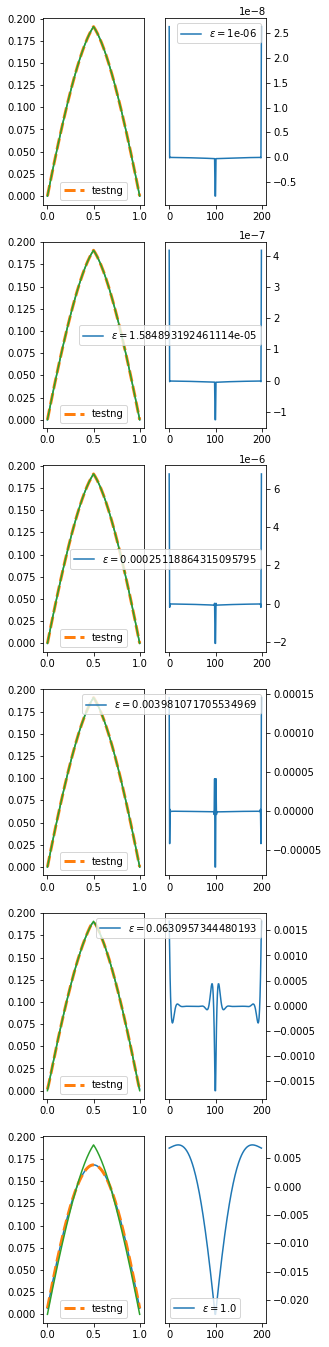

In [102]:
plt.figure(figsize=(4,24))

lep=6
for k,ep in enumerate(np.logspace(-lep,0,lep)):

    ax1 = plt.subplot2grid((lep,2),(k,0))
    ax2 = plt.subplot2grid((lep,2),(k,1))

    whole_etas = np.concatenate([etas_min, (1-etas_min)[::-1]])
    rbfi = interpolate.Rbf(whole_etas, PS[0], smooth=0.1, epsilon=ep)
    etas_inter = whole_etas
    ax1.plot(etas_inter, [rbfi(et) for et in etas_inter])
    etas_inter = np.linspace(0,1,10000)
    ax1.plot(etas_inter, [rbfi(et) for et in etas_inter],  '--', linewidth=3,label="testng")
    ax1.plot(whole_etas,PS[0])
    ax1.legend()
    ax2.plot(np.array([rbfi(et) for et in whole_etas]) - PS[0], label=r'$\epsilon =$' + str(ep))
    ax2.yaxis.tick_right()
    ax2.legend()

Now let's construct the 2 layers

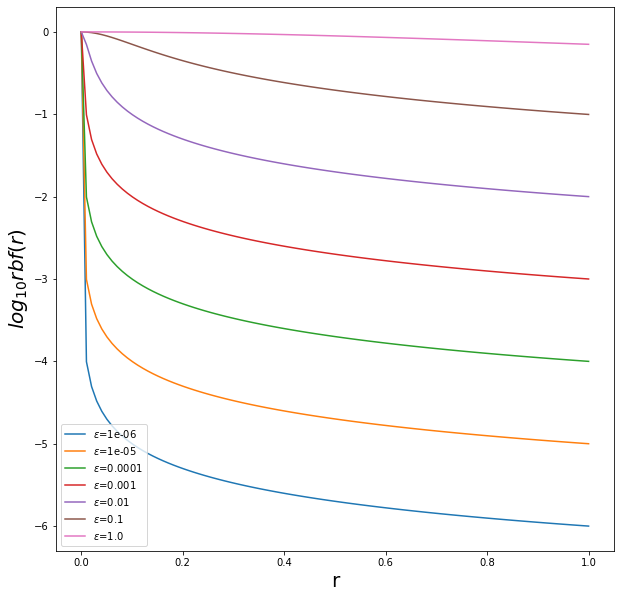

In [111]:
plt.figure(figsize=(10,10))
def rbfe(r,ep=1e-4):
    return np.sqrt((r/ep)**2 +1)
rs = np.linspace(0,1,100)
for ep in np.logspace(-6,0,7):
    plt.plot(rs, -np.log10(rbfe(rs,ep)), label=r'$\epsilon$='+str(ep))
plt.xlabel("r",size=20)
plt.ylabel(r'$log_{10} rbf(r)$',size=20)
plt.legend()

/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=4.10192e-33): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=5.37195e-33): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=4.02511e-34): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=2.40675e-32): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=4.

LinAlgError: Matrix is singular.

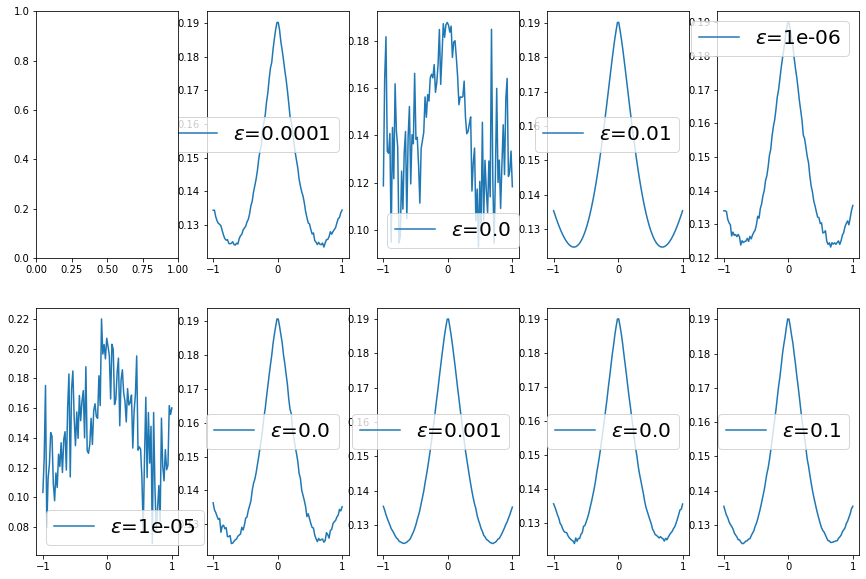

In [136]:
plt.figure(figsize=(30,10))

lep=10
for ind, ep in enumerate(np.logspace(-lep,0,lep+1)):
    ax = plt.subplot2grid((2,lep),(ind%2, ind%5))

    whole_etas = np.concatenate([etas_min, (1-etas_min)[::-1]])
    model = interpolate.Rbf(whole_etas, PS[0], smooth=0, epsilon=ep)
    def P_2(beta, eta, th=np.pi/4):
        p=0
        for n in [0,1]:
            p+=Prob_Outcome(n, np.cos(th)*alpha, beta, eta)*model(Postirior(n, np.sin(th)*alpha, beta, eta))
        return p

    betas = np.linspace(-1,1,100)
    ax.plot(betas, [P_2(b, .5) for b in betas], label=r'$\epsilon$='+str(np.round(ep,6)))
    ax.legend(prop={"size":20})

/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=4.46701e-31): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.98928e-31): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=3.47201e-31): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.80841e-30): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/cooper-cooper/.local/lib/python3.6/site-packages/scipy/interpolate/rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=3.

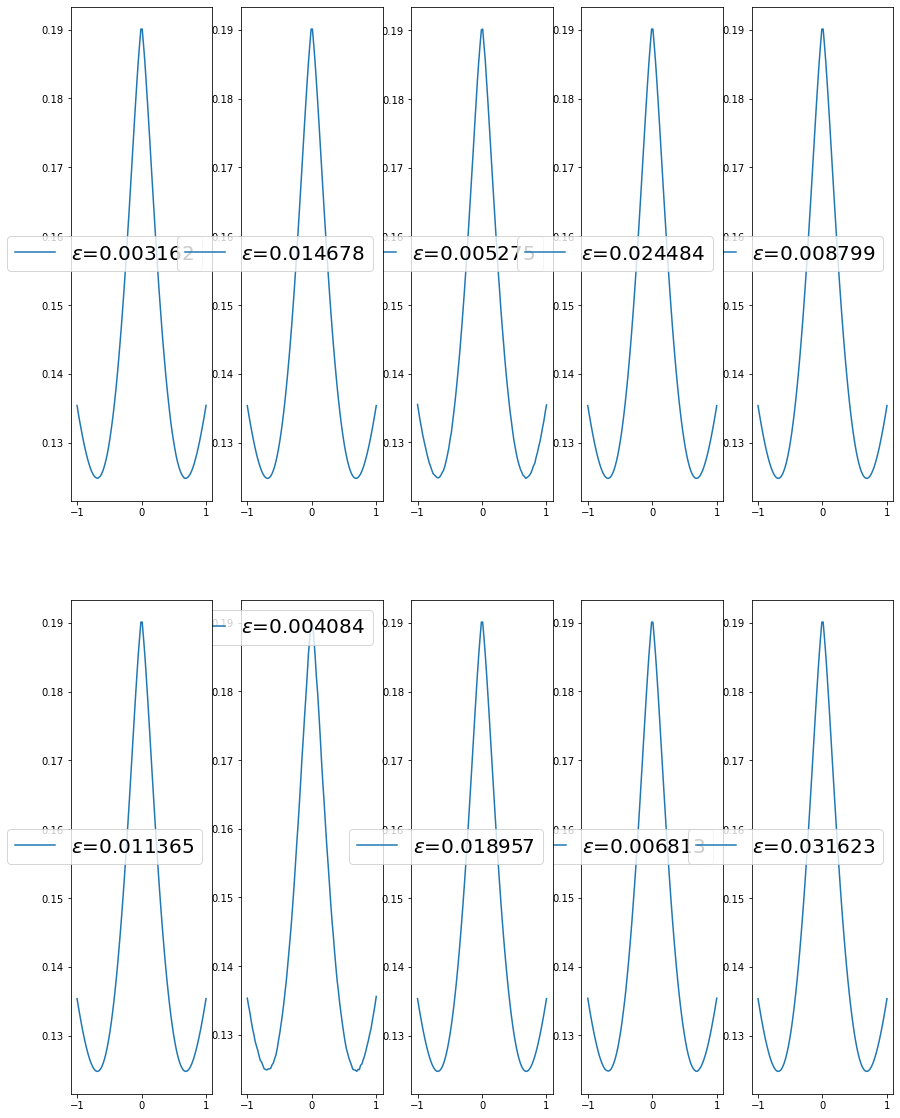

In [143]:
plt.figure(figsize=(30,20))

lep=10
for ind, ep in enumerate(np.logspace(-2.5,-1.5,10)):
    ax = plt.subplot2grid((2,lep),(ind%2, ind%5))

    whole_etas = np.concatenate([etas_min, (1-etas_min)[::-1]])
    model = interpolate.Rbf(whole_etas, PS[0], smooth=0, epsilon=ep)
    def P_2(beta, eta, th=np.pi/4):
        p=0
        for n in [0,1]:
            p+=Prob_Outcome(n, np.cos(th)*alpha, beta, eta)*model(Postirior(n, np.sin(th)*alpha, beta, eta))
        return p

    betas = np.linspace(-1,1,100)
    ax.plot(betas, np.array([P_2(b, .5) for b in betas]), label=r'$\epsilon$='+str(np.round(ep,6)))
    ax.legend(prop={"size":20})